#Content Warning:
#### The following project involves discussions of sexual assault/violence and domestic violence. If you or anyone you know is experiencing or has experienced sexual assault/violence or domestic violence, please do not hesitate to reach out for help.

#### National Sexual Assault Hotline: 1-800-656-4673

#### [Rape, Abuse, and Incest National Network Hotline](https://hotline.rainn.org/online)


#### National Domestic Violence Hotline: 1-800-799-7233
#### [National Domestic Violence Hotline](https://www.thehotline.org/)

# Imports

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import warnings

# Ignore all warnings
warnings.simplefilter("ignore")

# Working with Original Data

In [ ]:
data = pd.read_csv("/content/CrimeData.csv")
data.head()

,Incident Number,Highest Offense Description,Highest Offense Code,Family Violence,Occurred Date Time,Occurred Date,Occurred Time,Report Date Time,Report Date,Report Time,...,Census Tract,Clearance Status,Clearance Date,UCR Category,Category Description,X-coordinate,Y-coordinate,Latitude,Longitude,Location
0,2006471156,FAMILY DISTURBANCE,3400,N,02/16/2006 02:25:00 PM,02/16/2006,1425.0,02/16/2006 02:25:00 PM,02/16/2006,1425.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,20045044338,TAMPERING WITH ID NUMBER,2719,N,09/14/2004 03:32:00 PM,09/14/2004,1532.0,09/14/2004 03:32:00 PM,09/14/2004,1532.0,...,NaN,N,09/14/2004,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2006960811,FAMILY DISTURBANCE,3400,N,04/06/2006 10:29:00 AM,04/06/2006,1029.0,04/06/2006 10:29:00 AM,04/06/2006,1029.0,...,NaN,N,05/01/2006,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2013851154,SEXUAL ASSAULT OF CHILD/OBJECT,1707,Y,01/01/2009 12:01:00 AM,01/01/2009,1.0,03/26/2013 04:56:00 PM,03/26/2013,1656.0,...,4.00,C,04/11/2013,11C,Rape,0.0,0.0,NaN,NaN,NaN
4,20161800084,RAPE OF A CHILD,204,Y,06/28/2016 01:05:00 AM,06/28/2016,105.0,06/28/2016 01:05:00 AM,06/28/2016,105.0,...,24.41,C,07/01/2016,11A,Rape,0.0,0.0,NaN,NaN,NaN


Remove Unnecessary Columns and NA Values


In [ ]:
data.columns

Index(['Incident Number', 'Highest Offense Description',
       'Highest Offense Code', 'Family Violence', 'Occurred Date Time',
       'Occurred Date', 'Occurred Time', 'Report Date Time', 'Report Date',
       'Report Time', 'Location Type', 'Address', 'Zip Code',
       'Council District', 'APD Sector', 'APD District', 'PRA', 'Census Tract',
       'Clearance Status', 'Clearance Date', 'UCR Category',
       'Category Description', 'X-coordinate', 'Y-coordinate', 'Latitude',
       'Longitude', 'Location'],
      dtype='object')

In [ ]:
colsToDelete = ['Clearance Date', 'UCR Category', 'X-coordinate',
                'Y-coordinate', 'Location', 'PRA', 'Incident Number', 'Highest Offense Description',
                'Occurred Date Time', 'Address', 'Report Date Time', 'Census Tract', 'Report Time',
                'Report Date', 'Zip Code']
data.drop(columns=colsToDelete, inplace=True)

Remove rows with Nan values

In [ ]:
data = data.dropna()

Work with data from 2022 to now

In [ ]:
year = 2020
data["Occurred Date"] = np.array(data["Occurred Date"])
data['Occurred Date'] = pd.to_datetime(data['Occurred Date'])
data2 = data[data['Occurred Date'].dt.year >= year]

#### Save Preprocessed Data

In [ ]:
data2.to_csv("CrimeDataClean.csv")

# Working with Preprocessed Data

#### Import Preprocessed Data

In [ ]:
data = pd.read_csv("/content/CrimeDataClean.csv")
data.drop(columns=["Unnamed: 0"], inplace=True)
year = 2022
data['Occurred Date'] = pd.to_datetime(data['Occurred Date'])
data = data[data['Occurred Date'].dt.year >= year]
data

,Highest Offense Code,Family Violence,Occurred Date,Occurred Time,Location Type,Council District,APD Sector,APD District,Clearance Status,Category Description,Latitude,Longitude
0,700,N,2023-06-05,2000.0,PARKING /DROP LOT/ GARAGE,3.0,DA,3,N,Auto Theft,30.219033,-97.767189
1,601,N,2023-11-06,1553.0,HWY / ROAD / ALLEY/ STREET/ SIDEWALK,1.0,ID,4,N,Theft,30.307438,-97.681970
2,610,N,2023-10-30,735.0,PARKING /DROP LOT/ GARAGE,3.0,CH,2,N,Theft,30.261059,-97.712899
3,8503,N,2023-09-17,1415.0,HOTEL / MOTEL / ETC.,9.0,GE,2,N,Theft,30.265065,-97.738629
4,8503,N,2023-09-16,1218.0,RESIDENCE / HOME,4.0,ED,2,N,Theft,30.356811,-97.708357
...,...,...,...,...,...,...,...,...,...,...,...,...
134460,601,N,2022-10-02,300.0,PARKING /DROP LOT/ GARAGE,10.0,BA,8,N,Theft,30.361115,-97.749369
134463,601,N,2022-06-17,1500.0,PARKING /DROP LOT/ GARAGE,10.0,BA,8,N,Theft,30.383110,-97.769989
134468,614,N,2022-03-12,2200.0,PARKING /DROP LOT/ GARAGE,3.0,HE,4,N,Theft,30.231789,-97.718888
134469,607,N,2022-10-24,1805.0,GROCERY / SUPERMARKET,6.0,AD,8,C,Theft,30.454653,-97.825893


Create class with methods for encoding data

In [ ]:
class Encoding:

  def __init__(self, data):
    self.data = data

  def binaryEncoding(self, col, zeroLabel, oneLabel, data=None):
    if data is None:
      data = self.data
    encodedCol = []
    for item in data[col]:
      if item.upper() == oneLabel.upper():
        encodedCol.append(1)
      else:
        encodedCol.append(0)
    data[col + " (0, 1)"] = encodedCol
    data.drop(columns = [col], inplace=True)
    return data


  '''Helper function; used to determine the index at which
  the element passed through is at in the uniqueVals array'''
  def multiLabelOneHotEncodingHelper(self, element, uniqueVals):
    for i in range(len(uniqueVals)):
      if uniqueVals[i] == element:
        return i


  def multiLabelOneHotEncoding(self, col, data=None):
    if data is None:
      data = self.data
    '''Initializing a list with all unique column values
    and a dictionary with (unique column value)-(newCol pairs)'''
    vals = [val for val in data[col].unique()]
    labelDict = {}
    for i in range(len(vals)):
      labelDict[vals[i]] = []
    '''Checking each element in the column.
    First check which unique value the element has.
    Then the column representing that unique value will get a 1.
    All other columns will get a 0'''
    for element in data[col]:
      index = self.multiLabelOneHotEncodingHelper(element, vals)
      labelDict[vals[index]] += [1]
      for i in range(len(vals)):
        if i != index:
          labelDict[vals[i]] += [0]
    for i in range(len(vals)):
      data[col + '_' + str(vals[i])] = labelDict[vals[i]]
    data.drop(columns=[col], inplace=True)
    return data

  def multiLabelEncoding(self, col, data=None):
    if data is None:
      data = self.data
    vals = [val for val in data[col].unique()]
    valsDict = {}
    for i in range(len(vals)):
      valsDict[vals[i]] = i
    encodedCol = []
    for item in data[col]:
      encodedCol.append(valsDict[item])
    data[col + " Encoded"] = encodedCol
    data.drop(columns=[col], inplace=True)
    return data, valsDict

  def encodingTime(self, col, data=None):
    if data is None:
      data = self.data
    minVal = float('inf')
    maxVal = 0
    for time in data[col]:
      if time > maxVal:
        maxVal = time
      elif time < minVal:
        minVal = time
    den = maxVal - minVal
    normalizedCol = []
    for time in data[col]:
      normalizedCol.append((time - minVal)/den)
    data[col + " Encoded"] = normalizedCol
    data.drop(columns=[col], inplace=True)
    return data


  def minMaxScaling(self, col, data=None):
    if data is None:
      data = self.data
    minVal = float('inf')
    maxVal = 0
    for val in data[col]:
      if val > maxVal:
        maxVal = val
      elif val < minVal:
        minVal = val
    den = maxVal - minVal
    normalizedCol = []
    for val in data[col]:
      normalizedCol.append((val - minVal)/den)
    data[col + " MinMaxScaled"] = normalizedCol
    data.drop(columns=[col], inplace=True)
    return data


Encode DateTime data

In [ ]:
dateStr = [str(date) for date in data["Occurred Date"]]
monthCol = [int(month[5:7]) for month in dateStr]
dayCol = [int(day[8:10]) for day in dateStr]
data["Occurred Month"] = monthCol
data["Occurred Day"] = dayCol
data.drop(columns=["Occurred Date"], inplace=True)

Encode data for remaining columns

In [ ]:
encoding = Encoding(data)
data = encoding.minMaxScaling("Latitude")
data = encoding.minMaxScaling("Longitude")
data = encoding.encodingTime("Occurred Time")
data, highestOffenseCodeKey = encoding.multiLabelEncoding("Highest Offense Code")
data, locationTypeKey = encoding.multiLabelEncoding("Location Type")
data, councilDistrictKey = encoding.multiLabelEncoding("Council District")
data, apdSectorKey = encoding.multiLabelEncoding("APD Sector")
data, apdDistrictKey = encoding.multiLabelEncoding("APD District")
data, clearanceStatusKey = encoding.multiLabelEncoding("Clearance Status")
data, categoryDiscriptionKey = encoding.multiLabelEncoding("Category Description")
data = encoding.binaryEncoding("Family Violence", zeroLabel='N', oneLabel='Y')
data.head()

,Occurred Month,Occurred Day,Latitude MinMaxScaled,Longitude MinMaxScaled,Occurred Time Encoded,Highest Offense Code Encoded,Location Type Encoded,Council District Encoded,APD Sector Encoded,APD District Encoded,Clearance Status Encoded,Category Description Encoded,"Family Violence(0, 1)"
0,6,5,0.282774,0.001629,0.847817,0,0,0,0,0,0,0,0
1,11,6,0.499037,0.002499,0.658330,1,1,1,1,1,0,1,0
2,10,30,0.385582,0.002183,0.311573,2,0,0,2,2,0,1,0
3,9,17,0.395381,0.001921,0.599830,3,2,2,3,2,0,1,0
4,9,16,0.619818,0.002230,0.516320,3,3,3,4,2,0,1,0


#### Save Encoded Data

In [ ]:
data.to_csv("CrimeDataEncoded.csv")

#### Import Encoded Data

In [2]:
data = pd.read_csv("/content/CrimeDataEncoded.csv")
data.drop(columns=["Unnamed: 0"], inplace=True)
data.head()

,Occurred Month,Occurred Day,Latitude MinMaxScaled,Longitude MinMaxScaled,Occurred Time Encoded,Highest Offense Code Encoded,Location Type Encoded,Council District Encoded,APD Sector Encoded,APD District Encoded,Clearance Status Encoded,Category Description Encoded,"Family Violence(0, 1)"
0,6,5,0.282774,0.001629,0.847817,0,0,0,0,0,0,0,0
1,11,6,0.499037,0.002499,0.658330,1,1,1,1,1,0,1,0
2,10,30,0.385582,0.002183,0.311573,2,0,0,2,2,0,1,0
3,9,17,0.395381,0.001921,0.599830,3,2,2,3,2,0,1,0
4,9,16,0.619818,0.002230,0.516320,3,3,3,4,2,0,1,0


# Data Spliting

In [3]:
X = data[data.columns[:-1]].values
y = data[data.columns[-1]].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Machine Learning

###Imports for Model Metrics

In [22]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

###Decision Tree Model

####Imports for Decision Tree Model

In [21]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

####Model depth for best test accuracy

Decision Tree with max depth of 6 layers has highest accuracy.


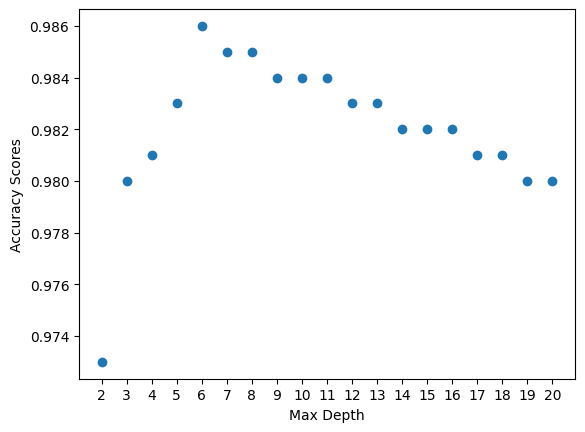

In [ ]:
def bestDepthForAccuracyDT():
  maxAcc, bestDepth = 0, 0
  accuracies = []
  for i in range(2, 21):
    decision_tree = DecisionTreeClassifier(max_depth=i)
    decision_tree.fit(X_train, y_train)
    y_pred_dt = decision_tree.predict(X_test)
    accuracy_dt = accuracy_score(y_test, y_pred_dt)
    accuracies.append(round(accuracy_dt, 3))
    if accuracy_dt > maxAcc:
      maxAcc = accuracy_dt
      bestDepth = i
  max_depths = np.arange(2, 21)
  plt.scatter(max_depths, accuracies)
  plt.xlabel("Max Depth")
  plt.xticks(np.arange(2, 21))
  plt.ylabel("Accuracy Scores")
  print(f"Decision Tree with max depth of {bestDepth} layers has highest accuracy.")

bestDepthForAccuracyDT()

In [ ]:
decision_tree = DecisionTreeClassifier(max_depth=6)
decision_tree.fit(X_train, y_train)
y_pred_dt = decision_tree.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
classification_report_dt = classification_report(y_test, y_pred_dt, target_names=["class 0", "class 1"])

#### Decision Tree Metrics

In [ ]:
print("Decision Tree Classifier Classification Report")
print(f"Decision Tree Classifier Accuracy: {round(accuracy_dt, 2)}")
print(classification_report_dt)

Decision Tree Classifier Classification Report
Decision Tree Classifier Accuracy: 0.99
              precision    recall  f1-score   support

     class 0       0.99      1.00      0.99     11961
     class 1       0.87      0.71      0.78       453

    accuracy                           0.99     12414
   macro avg       0.93      0.85      0.89     12414
weighted avg       0.98      0.99      0.98     12414



#### Decision Tree Split Visualization

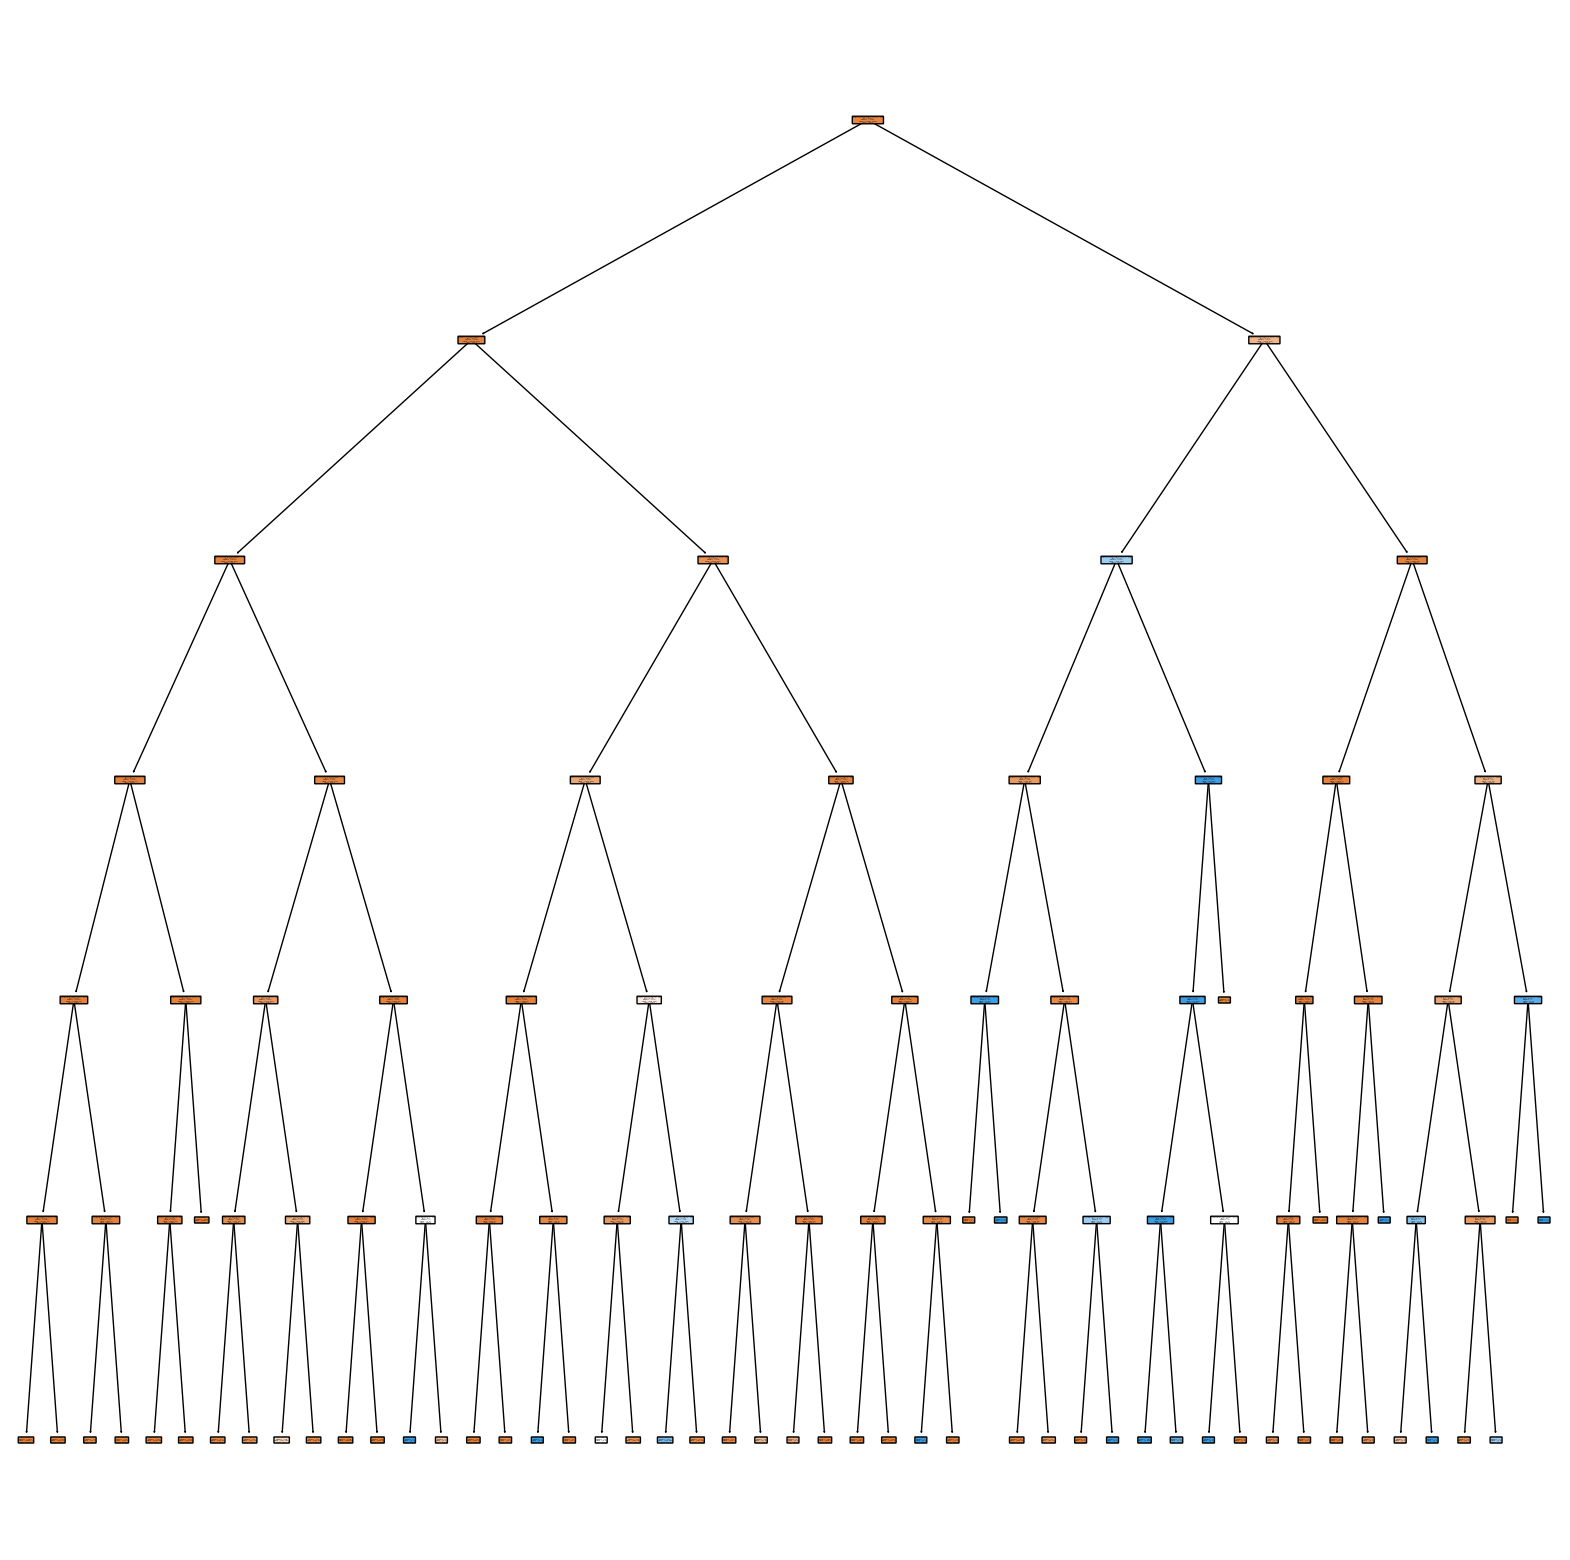

In [ ]:
features = data.columns[:-1]
plt.figure(figsize=(20, 20))
plot_tree(decision_tree, feature_names=features, class_names=['class 0', 'class 1'], filled=True, rounded=True)
plt.show()

### Random Forrest Model

####Imports for Random Forrest Model

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

####Model depth for best test accuracy

Random Forrest with max depth of 9 layers has highest accuracy.


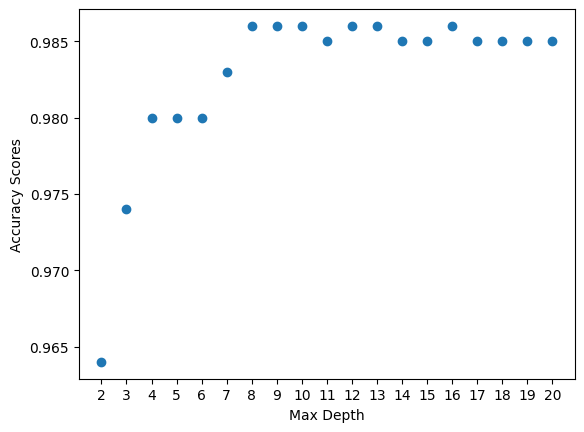

In [14]:
def bestDepthForAccuracyRF():
  maxAcc, bestDepth = 0, 0
  accuracies = []
  for i in range(2, 21):
    randomForrest = RandomForestClassifier(max_depth=i)
    randomForrest.fit(X_train, y_train)
    y_pred_RF = randomForrest.predict(X_test)
    accuracy_RF = accuracy_score(y_test, y_pred_RF)
    accuracies.append(round(accuracy_RF, 3))
    if accuracy_RF > maxAcc:
      maxAcc = accuracy_RF
      bestDepth = i
  max_depths = np.arange(2, 21)
  plt.scatter(max_depths, accuracies)
  plt.xlabel("Max Depth")
  plt.xticks(np.arange(2, 21))
  plt.ylabel("Accuracy Scores")
  print(f"Random Forrest with max depth of {bestDepth} layers has highest accuracy.")

bestDepthForAccuracyRF()

In [15]:
randomForrest = RandomForestClassifier(max_depth=9)
randomForrest.fit(X_train, y_train)
y_pred_RF = randomForrest.predict(X_test)
accuracy_RF = accuracy_score(y_test, y_pred_RF)
classification_report_RF = classification_report(y_test, y_pred_RF, target_names=["class 0", "class 1"])

#### Random Forrest Metrics

In [16]:
print("Random Forrest Classifier Classification Report")
print(f"Random Forrest Classifier Accuracy: {round(accuracy_RF, 2)}")
print(classification_report_RF)

Random Forrest Classifier Classification Report
Random Forrest Classifier Accuracy: 0.99
              precision    recall  f1-score   support

     class 0       0.99      1.00      0.99     11961
     class 1       0.88      0.70      0.78       453

    accuracy                           0.99     12414
   macro avg       0.94      0.85      0.89     12414
weighted avg       0.98      0.99      0.98     12414



###Logistic Regression

####Imports for Logistic Regression

In [17]:
from sklearn.linear_model import LogisticRegression

In [23]:
logisticRegressionClassifier = LogisticRegression()
logisticRegressionClassifier.fit(X_train, y_train)
y_pred_LR = logisticRegressionClassifier.predict(X_test)
accuracy_LR = accuracy_score(y_test, y_pred_LR)
classification_report_LR = classification_report(y_test, y_pred_LR, target_names=["class 0", "class 1"])

####Logistic Regression Metrics

In [26]:
print("Logistic Regression Classifier Classification Report")
print(f"Logistic Regression Classifier Accuracy: {round(accuracy_LR, 2)}")
print(classification_report_LR)

Logistic Regression Classifier Classification Report
Logistic Regression Classifier Accuracy: 0.96
              precision    recall  f1-score   support

     class 0       0.97      0.99      0.98     11961
     class 1       0.55      0.17      0.26       453

    accuracy                           0.96     12414
   macro avg       0.76      0.58      0.62     12414
weighted avg       0.95      0.96      0.96     12414



### Naive Bayes Model

####Imports for Naive Bayes Model

In [20]:
from sklearn.naive_bayes import GaussianNB

In [25]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_NB = gnb.predict(X_test)
accuracy_NB = accuracy_score(y_test, y_pred_NB)
classification_report_NB = classification_report(y_test, y_pred_NB, target_names=["class 0", "class 1"])

####Naive Bayes Metrics

In [27]:
print("Naive Bayes Classifier Classification Report")
print(f"Naive Bayes Classifier Accuracy: {round(accuracy_NB, 2)}")
print(classification_report_NB)

Naive Bayes Classifier Classification Report
Naive Bayes Classifier Accuracy: 0.96
              precision    recall  f1-score   support

     class 0       0.98      0.97      0.98     11961
     class 1       0.45      0.60      0.52       453

    accuracy                           0.96     12414
   macro avg       0.72      0.79      0.75     12414
weighted avg       0.97      0.96      0.96     12414



###SVM

####Imports for SVM

In [40]:
from sklearn.svm import SVC

In [50]:
svm = SVC(kernel='poly')
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
classification_report_svm = classification_report(y_test, y_pred_svm, target_names=["class 0", "class 1"])

####Metrics For SVM

In [51]:
print("SVM Classifier Classification Report")
print(f"SVM Classifier Accuracy: {round(accuracy_svm, 2)}")
print(classification_report_svm)

SVM Classifier Classification Report
SVM Classifier Accuracy: 0.97
              precision    recall  f1-score   support

     class 0       0.97      1.00      0.98     11961
     class 1       0.80      0.23      0.36       453

    accuracy                           0.97     12414
   macro avg       0.89      0.61      0.67     12414
weighted avg       0.97      0.97      0.96     12414



###KNN

####Imports for KNN

In [43]:
from sklearn.neighbors import KNeighborsClassifier

In [44]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
classification_report_knn = classification_report(y_test, y_pred_knn, target_names=["class 0", "class 1"])

####Metrics for KNN

In [45]:
print("KNN Classifier Classification Report")
print(f"KNN Classifier Accuracy: {round(accuracy_knn, 2)}")
print(classification_report_knn)

KNN Classifier Classification Report
KNN Classifier Accuracy: 0.97
              precision    recall  f1-score   support

     class 0       0.98      0.99      0.99     11961
     class 1       0.68      0.42      0.52       453

    accuracy                           0.97     12414
   macro avg       0.83      0.71      0.75     12414
weighted avg       0.97      0.97      0.97     12414



###Neural Network

####Imports for Neural Network

In [38]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import precision_recall_fscore_support

#### Neural Network Training and Metrics

In [57]:
def neuralNetwork(X_train, y_train, X_test, y_test, num_nodes, dropout_prob, lr, epochs, batch_size):
  nn_model = tf.keras.Sequential([
      tf.keras.layers.Dense(num_nodes, activation="sigmoid", input_shape=(12,)),
      tf.keras.layers.Dense(num_nodes // 2, activation='sigmoid'),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(num_nodes // 4, activation='sigmoid'),
      tf.keras.layers.Dense(1, activation='sigmoid')
  ])

  nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr), loss='binary_crossentropy', metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

  history = nn_model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0)

  y_pred = nn_model.predict(X_test)
  y_pred_classes = (y_pred > 0.5).astype(int)

  accuracy = history.history['accuracy'][-1]

  precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred_classes, average=None)

  print("Neural Network Classification Report:")
  print(f"  Neural Network Accuracy: {round(accuracy, 2)}")
  print("             Precision     Recall      F1 Score")
  print(f"Class 0      {round(precision[0], 2): <12} {round(recall[0], 2): <12} {round(f1_score[0], 2): <12} ")
  print(f"Class 1      {round(precision[1], 2): <12} {round(recall[1], 2): <12} {round(f1_score[1], 2): <12} ")
  return nn_model, history, accuracy, precision, recall, f1_score



NUM_NODES, DROPOUT_PROB, LR, EPOCHS, BATCH_SIZE = 64, 0.2, 0.001, 100, 64

neuralNetwork(X_train, y_train, X_test, y_test, num_nodes=NUM_NODES, dropout_prob=DROPOUT_PROB, lr=LR, epochs=EPOCHS, batch_size=BATCH_SIZE);


388/388 [==============================] - 1s 2ms/step
Neural Network Classification Report:
  Neural Network Accuracy: 0.98
             Precision     Recall      F1 Score
Class 0      0.98         1.0          0.99         
Class 1      0.83         0.59         0.69         


# Hypotheses
### Since the Decision Tree Classifier seemed to have a high precision and recall for both classes and is easily interpretable, our hypotheses will be answered using the Decision Tree Classifier.

#### Feature Selection from Decision Tree Classifier Model

In [ ]:
!pip install shap
import shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.9/532.9 kB 7.2 MB/s eta 0:00:00


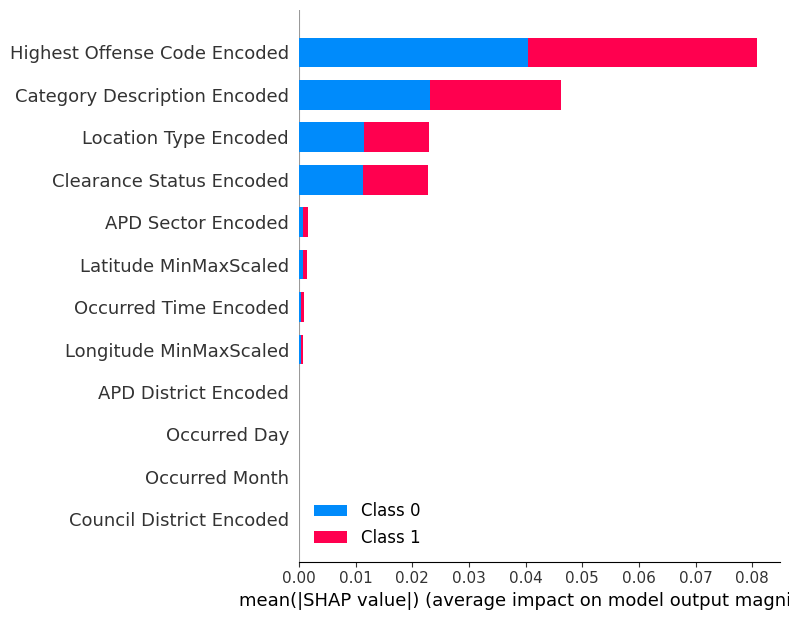

In [ ]:
explainer = shap.Explainer(decision_tree)
shap_values = explainer.shap_values(X[::200])
shap.summary_plot(shap_values, X[::200], feature_names=features)

####Above plot referenced for Hypothesis 1 and Hypothesis 2

# Hypothesis 1: Family violence will be more common in the winter


#### From the mean(|SHAP value|) plot, which plots every features' average impact on model prediction, it appears that the **Occurred Month** feature does not have a significant impact on predicting if a given report includes family violence. Since the month in which a report is filed does not have a significant impact on the probability of the report involving family violence, the season in which the report is filed also does not have a significant impact on the probability of the report involving family violence. Hence, the hypothesis: **family violence will be more common in the winter** is false.

# Hypothesis 2: Family violence will occur more in areas away from the city

#### From the mean(|SHAP value|) plot, which plots every features' average impact on model prediction, it appears that the **Latitude** and **Longitude** features do not have a significant impact on predicting if a given report includes family violence. Since the **Latitude** and **Longitude** features do not have a significant impact on predicting if a given report includes family violence, the cartisian/geographic location that an incident occurs at with respect to the "city" of Austin does not have a significant impact on predicting if a given report includes family violence. Hence, the hypothesis: **Family violence will occur more in areas away from the city** is false.

# Hypothesis 3: Family violence will be more common in residential areas

View all location types

In [ ]:
# See all location types
locationTypes = locationTypeKey.keys()
locationTypeStr = ""
for locationType in locationTypes:
  locationTypeStr += locationType + "\n"
print(locationTypeStr)

PARKING /DROP LOT/ GARAGE
HWY / ROAD / ALLEY/ STREET/ SIDEWALK
HOTEL / MOTEL / ETC.
RESIDENCE / HOME
AIR / BUS / TRAIN TERMINAL
DRUG STORE / DOCTOR'S OFFICE / HOSPITAL
CONVENIENCE STORE
OTHER / UNKNOWN
PARK / PLAYGROUND
SPECIALTY  STORE
COMMUNITY CENTER
SERVICE/ GAS STATION
COMMERCIAL / OFFICE BUILDING
DEPARTMENT / DISCOUNT STORE
GROCERY / SUPERMARKET
BANK / SAVINGS & LOAN
CONSTRUCTION SITE
SHOPPING MALL
BAR / NIGHTCLUB
AMUSEMENT PARK
RESTAURANT
RENTAL STORAGE FACILITY
AUTO DEALERSHIP NEW / USED
DAYCARE FACILITY
ATM SEPARATE FROM BANK
DOCK / WHARF / FREIGHT / MODAL TERMINAL
GOVERNMENT / PUBLIC BUILDING
LIQUOR STORE
LAKE / WATERWAY/BEACH
CHURCH / SYNAGOGUE / TEMPLE / MOSQUE
SCHOOL - ELEMENTARY / SECONDARY
FIELD / WOODS
GAMBLING FACILITY / CASINO / RACE TRACK
ARENA / STADIUM / FAIRGROUNDS / COLISEUM
INDUSTRIAL SITE
JAIL / PRISON/PENITENTIARY/CORRECTIONS FACILITY
SCHOOL - COLLEGE / UNIVERSITY
SHELTER-MISSION / HOMELESS
CAMP / CAMPGROUND
ABANDONED/CONDEMNED STRUCTURE
FARM FACILITY
REST ARE

View encoding for RESIDENCE / HOME location type

In [ ]:
# See encodings for residential area(s)
residence = "RESIDENCE / HOME"
print(f"Encoding for RESIDENCE / HOME is {locationTypeKey[residence]}")

Encoding for RESIDENCE / HOME is 3


Find the percentage of incidents that involve family violence per location type.

In [ ]:
def ratioFamilyViolence(locationType):
  relevantData = data[data["Category Description Encoded"] == locationType]
  relevantDataFamilyViolence = relevantData[relevantData["Family Violence(0, 1)"]==1]
  if relevantData.shape[0] == 0:
    pass
  else:
    ratio = relevantDataFamilyViolence.shape[0] / relevantData.shape[0]
    return ratio

def removeNone(lst):
  floatLst = []
  for item in lst:
    if isinstance(item[-1], float):
      floatLst.append(item)
  return floatLst


def mySort(lst):
  for i in range(len(lst)):
    for j in range(i+1, len(lst)):
      if lst[i][-1] < lst[j][-1]:
        lst[i], lst[j] = lst[j], lst[i]
  return lst

locationTypeList = list(locationTypeKey.keys())
ratioList = []
for i in range(len(locationTypeList)):
  familyViolenceRatio = ratioFamilyViolence(i)
  ratioList.append([locationTypeList[i], familyViolenceRatio])
ratioList = removeNone(ratioList)
ratioList = mySort(ratioList)
print(ratioList)

[['CONVENIENCE STORE', 0.75], ['HOTEL / MOTEL / ETC.', 0.41777689401471463], ["DRUG STORE / DOCTOR'S OFFICE / HOSPITAL", 0.23529411764705882], ['AIR / BUS / TRAIN TERMINAL', 0.007792207792207792], ['RESIDENCE / HOME', 0.0029658284977433914], ['HWY / ROAD / ALLEY/ STREET/ SIDEWALK', 0.0025435386332373017], ['PARKING /DROP LOT/ GARAGE', 0.001206140350877193]]


Create horizontal bar plot to visualize which location types have the highest percentage of family violence in their reports

RESIDENCE / HOME percentage of cases with Family Violence 0.002966%


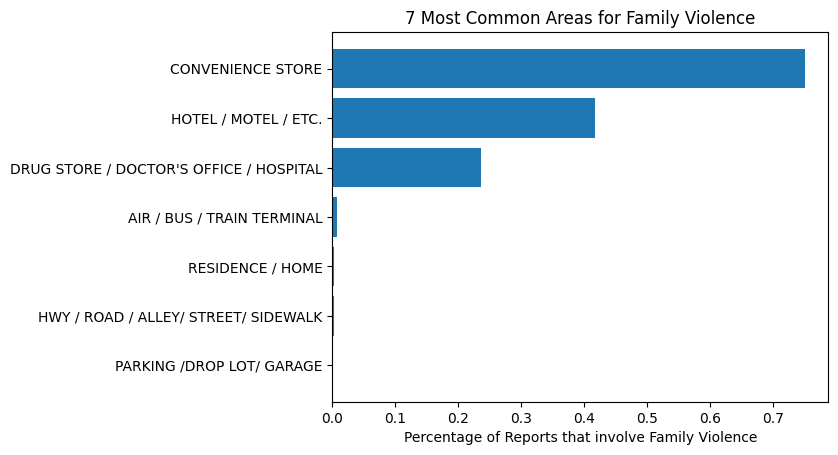

In [ ]:
areaNames = [values[0] for values in ratioList]
familyViolenceInAreas = [values[-1] for values in ratioList]

areaNames = areaNames[::-1]
familyViolenceInAreas = familyViolenceInAreas[::-1]

plt.barh(areaNames, familyViolenceInAreas);
plt.title("7 Most Common Areas for Family Violence")
plt.xlabel("Percentage of Reports that involve Family Violence");
print(f"RESIDENCE / HOME percentage of cases with Family Violence {round(familyViolenceInAreas[2], 6)}%")

#### The horizontal bar plot above displays the percentage of cases, per location type, that involve family violence for the 7 most common areas for family violence. Since, only 0.002966% of the incidents that occurred at the RESIDENCE / HOME location involved family violence, family violence does not seem to be more common in residential areas when compared to locations where a significant percentage of the incidents involve family violence such as: DRUG STORE / DOCTOR'S OFFICE / HOSPITAL, HOTEL / MOTEL / ETC. -, and CONVENIENCE STORE. Hence, our hypothesis, **Family violence will be more common in residential areas**, is false.

# Hypothesis 4: Incidents involving rape will be less likely to include family violence

View encoding for rape in **Category Description** column of data

In [ ]:
categoryDiscriptionKey

{'Auto Theft': 0,
 'Theft': 1,
 'Aggravated Assault': 2,
 'Burglary': 3,
 'Robbery': 4,
 'Murder': 5,
 'Rape': 6}

Create visualization to view percentage of reports that involve rape and family violence vs percentage of reports that involve rape, but not family violence.

Percentage of Reports that involve Rape and not Family Violence 0.0000334476%
Percentage of Reports that involve Rape and Family Violence 0.0026420079%


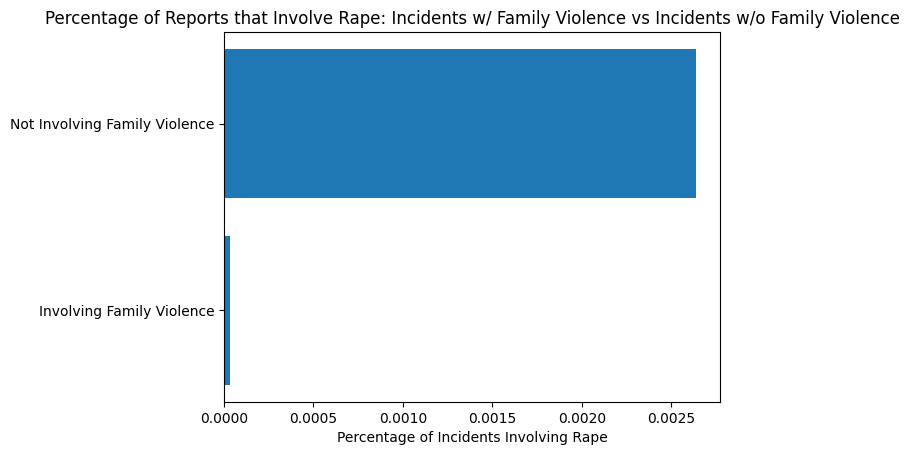

In [58]:
dataFamilyViolence = data[data["Family Violence(0, 1)"] == 1]
dataNotFamilyViolence = data[data["Family Violence(0, 1)"] == 0]

rRatioFV = dataFamilyViolence[dataFamilyViolence["Category Description Encoded"] == 6].shape[0] / dataFamilyViolence.shape[0]
rRatioNotFV = dataNotFamilyViolence[dataNotFamilyViolence["Category Description Encoded"] == 6].shape[0] / dataNotFamilyViolence.shape[0]

labels = ["Involving Family Violence", "Not Involving Family Violence"]
values = [rRatioNotFV, rRatioFV]
plt.barh(labels, values);
plt.xlabel("Percentage of Incidents Involving Rape")
plt.title("Percentage of Reports that Involve Rape: Incidents w/ Family Violence vs Incidents w/o Family Violence");
print(f"Percentage of Reports that involve Rape and not Family Violence {format(rRatioNotFV, '.10f')}%")
print(f"Percentage of Reports that involve Rape and Family Violence {format(rRatioFV, '.10f')}%")

#### The horizontal bar plot above portrays the percentage of reports that involve rape for both instances of family violence and instances without family violence. Since instances of rape without family violence are far more common than instances of rape with family violence, our hypothesis is true. Hence, **Incidents involving rape will be less likely to include family violence**.